# This notebook loads the matrices from Oswald (2019, QE)
All five elements have kindly been calculated and provided by Florian Oswald and dowloaded from his GitHub: https://github.com/floswald/migration/tree/thomas/mig/out

In [1]:
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# theta (estimated)
est_par_tex = (r'$\hat{\xi}_1$',r'$\hat{\xi}_2$',r'$\hat{\eta}$',r'$\hat{\omega}$',r'$\hat{\alpha}_0$',r'$\hat{\alpha}_1$',r'$\hat{\alpha}_2$',r'$\hat{\alpha}_3$',r'$\hat{\alpha}_4$',r'$\hat{\pi}_{\tau}$'
              ,r'$\hat{A}_{NwE}$',r'$\hat{A}_{MdA}$',r'$\hat{A}_{StA}$',r'$\hat{A}_{WNC}$',r'$\hat{A}_{WSC}$',r'$\hat{A}_{ENC}$',r'$\hat{A}_{ESC}$',r'$\hat{A}_{Pcf}$',r'$\hat{A}_{Mnt}$')
theta = np.array([[-0.009,0.003,0.217,4.364,3.165,0.017,0.0013,0.217,0.147,0.697, 0.044,0.112,0.168,0.09,0.122,0.137,0.063,0.198,0.124]])

# gamma (fixed)
fixed_par_tex = (r'${\tilde{\gamma}}$',r'${\beta}$',r'${\rho}$',r'${\sigma}$',r'${\phi}$',r'${\chi}$',r'${r}$',r'${r}^m$')
gamma = np.array([[1.43, 0.96, 0.96, 0.118,0.06,0.2,0.04,0.055]])

# option value of migration
ATE_str = '$\hat{\Delta}^e$'
ATE = 19.2

In [3]:
# load data
A = np.loadtxt('thomas_A.txt',delimiter="\t")
B = np.loadtxt('thomas_B.txt',delimiter="\t")
D = - np.loadtxt('thomas_D.txt',delimiter="\t")
G = - np.loadtxt('thomas_G.txt',delimiter="\t")
W = np.loadtxt('thomas_W.txt',delimiter="\t")

## Calculate sensitivity measures

In [4]:
GWG = G.T @ W @ G
Lambda = - np.linalg.inv(GWG) @ G.T @ W
S = Lambda @ D
H = A + B @ S

Se = S * (gamma / theta.T)
He = H * (gamma / ATE)

In [5]:
def plot_heat(sens,ylabel,name):
    fs = 13
    sns.set(rc={'text.usetex' : True})
    cmap = sns.diverging_palette(220, 10, sep=10, n=100)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax = sns.heatmap(sens,annot=False,fmt="2.2f",annot_kws={"size": fs},xticklabels=fixed_par_tex,yticklabels=ylabel,center=0,linewidth=.5,cmap=cmap)
    
    plt.yticks(rotation=0) 
    ax.tick_params(axis='both', which='major', labelsize=fs)
    plt.savefig('sense_Oswald' + name + '.pdf',bbox_inches="tight")

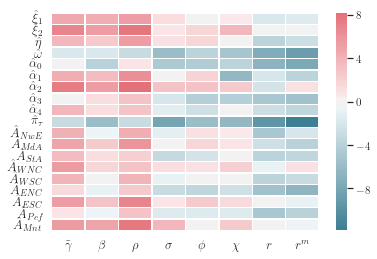

In [6]:
# plot heatmap
sense = np.log(np.abs(Se))
plot_heat(sense,est_par_tex,'_theta')

In [7]:
# construct LaTeX table
num_gamma = len(fixed_par_tex)
with open('Oswald_H' + '.tex',"w") as file:
    file.write("\\begin{tabular}{l*{%d}{c}} \\toprule \n" %num_gamma)
    for g in range(num_gamma):
        file.write("& %s " %fixed_par_tex[g])
    file.write("\\\\ \\cmidrule(lr){2-%d} \n " %(num_gamma+1))
    file.write("%s" %ATE_str)
    for g in range(num_gamma):
        file.write("& %2.3f " %He[0,g])

    file.write("\\\\ \\bottomrule \n \\end{tabular}" )

num_theta = len(est_par_tex)
with open('Oswald_Se' + '.tex',"w") as file:
    file.write("\\begin{tabular}{l*{%d}{c}} \\toprule \n" %num_gamma) 
    #file.write("\\multicolumn{%d}{c}{} \\\\ \\toprule \n" %(1+num_theta))
    for g in range(num_gamma):
        file.write("& %s " %fixed_par_tex[g])
    file.write("\\\\ \\cmidrule(lr){2-%d} \n " %(num_gamma+1))

    # sensitivity
    for t in range(num_theta):
        file.write(" %s " %est_par_tex[t])
        for g in range(num_gamma):
            file.write("& %2.3f " %Se[t,g])
        file.write("\\\\ \n ")

    file.write("\\bottomrule \n \\end{tabular}" )